In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
def get_X():
    X = np.round(np.random.randn(20), 2)
    return X 

In [47]:
def get_Y(X):
    Y = np.tanh(X) + np.random.sample(len(X))/2
    return np.round(Y, 2) 

In [48]:
def get_matrix(X, q):
    if q == 2:
        A = [[sum(X**2), sum(X)]]    
        return np.insert(A, 1, [sum(X), 20] , axis = 0)
    if q == 3:
        A = [[sum(X**4), sum(X**3), sum(X**2)]]
        A = np.insert(A, 1, [sum(X**3), sum(X**2), sum(X)] , axis = 0)
        return np.insert(A, 2, [sum(X**2), sum(X), 20] , axis = 0)
    if q == 4:
        A = [[sum(X**6), sum(X**5), sum(X**4), sum(X**3)]]
        A = np.insert(A, 1, [sum(X**5), sum(X**4), sum(X**3), sum(X**2)] , axis = 0)
        A = np.insert(A, 2, [sum(X**4), sum(X**3), sum(X**2), sum(X)] , axis = 0)
        return np.insert(A, 3, [sum(X**3), sum(X**2), sum(X), 20] , axis = 0)

In [49]:
def get_full_matrix(A, X, Y, q):
    if q == 2:    
        return np.insert(A, np.shape(A)[1], [sum(X*Y), sum(Y)], axis = 1)
    if q == 3:
        return np.insert(A, np.shape(A)[1], [sum(X**2*Y), sum(X*Y), sum(Y)], axis = 1)
    if q == 4:
        return np.insert(A, np.shape(A)[1], [sum(X**3*Y), sum(X**2*Y), sum(X*Y), sum(Y)], axis = 1)

In [50]:
def forward(A):
    n = np.shape(A)[0]
    for i in range(n):
        main_index = np.argmax(np.abs(A[i:, i])) + i
        C = np.copy(A[i])
        A[i] = np.copy(A[main_index])
        A[main_index] = np.copy(C)
        A[i] /= A[i, i]
        for j in range(i+1, n):
            A[j] -= A[i]*A[j, i]
    return A

In [51]:
def backward(A):
    n = np.shape(A)[0]
    for i in range(1, n):                                           
        for j in range(1, n):                                       
            A[n-i-j] -= A[n-i]*A[n-i-j, n-i]                       
    return A

In [52]:
def get_polinom_1(q, X, Y):
    M = get_matrix(X, q)
    N = get_full_matrix(M, X, Y, q)
    print('Матрица коэффициентов для полинома 1-й степени:')
    print(N)
    N = forward(N)
    print(N)
    N = backward(N)
    print(N)

    a = np.round(N[0, np.shape(N)[1]-1], 2)
    b = np.round(N[1, np.shape(N)[1]-1], 2)
    print(f'Коэффициенты а и b для полинома 1-й степени: a1 = {a}, b1 = {b}')
    return a, b

In [53]:
def get_polinom_2(q, X, Y):
    M = get_matrix(X, q)
    N = get_full_matrix(M, X, Y, q)
    print('Матрица коэффициентов для полинома 2-й степени:')
    print(N)
    N = forward(N)
    print(N)
    N = backward(N)
    print(N)

    a = np.round(N[0, np.shape(N)[1]-1], 2)
    b = np.round(N[1, np.shape(N)[1]-1], 2)
    c = np.round(N[2, np.shape(N)[1]-1], 2)
    print(f'Коэффициенты а, b и c для полинома 2-й степени: a2 = {a}, b2 = {b}, c2 = {c}')
    return a, b, c

In [54]:
def get_polinom_3(q, X, Y):
    M = get_matrix(X, q)
    N = get_full_matrix(M, X, Y, q)
    print('Матрица коэффициентов для полинома 3-й степени:')
    print(N)
    N = forward(N)
    print(N)
    N = backward(N)
    print(N)

    a = np.round(N[0, np.shape(N)[1]-1], 2)
    b = np.round(N[1, np.shape(N)[1]-1], 2)
    c = np.round(N[2, np.shape(N)[1]-1], 2)
    d = np.round(N[3, np.shape(N)[1]-1], 2)
    print(f'Коэффициенты а, b, c и d для полинома 3-й степени: a3 = {a}, b3 = {b}, c3 = {c}, d3 = {d}')
    return a, b, c, d

Значения Х:
[ 0.33 -0.77  2.02  1.8  -0.22  0.27  0.81  0.17  1.93 -0.44 -0.33  0.78
 -0.55 -0.32 -0.07 -2.52 -0.11 -1.61 -0.8   0.97]
Значения Y:
[ 0.73 -0.22  1.38  1.1  -0.06  0.63  0.75  0.2   1.32  0.07 -0.29  0.91
 -0.04 -0.15  0.04 -0.55  0.1  -0.73 -0.56  1.16]
Матрица коэффициентов для полинома 1-й степени:
[[24.4096  1.34   13.5157]
 [ 1.34   20.      5.79  ]]
[[1.         0.05489643 0.55370428]
 [0.         1.         0.25333359]]
[[1.         0.         0.53979717]
 [0.         1.         0.25333359]]
Коэффициенты а и b для полинома 1-й степени: a1 = 0.54, b1 = 0.25
Матрица коэффициентов для полинома 2-й степени:
[[90.68760172  1.765256   24.4096     10.459409  ]
 [ 1.765256   24.4096      1.34       13.5157    ]
 [24.4096      1.34       20.          5.79      ]]
[[1.         0.01946524 0.26916138 0.1153345 ]
 [0.         1.         0.03548114 0.54613229]
 [0.         0.         1.         0.18675771]]
[[1.         0.         0.         0.05456492]
 [0.         1.         

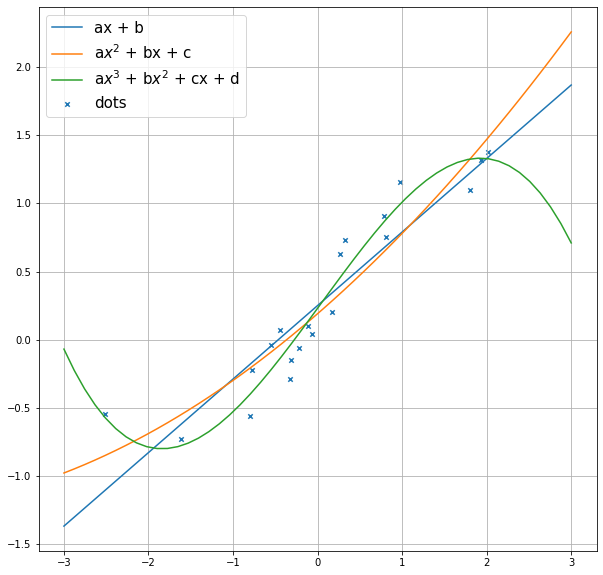

In [55]:
X = get_X()
print('Значения Х:')
print(X)
Y = get_Y(X)
print('Значения Y:')
print(Y)
a1, b1 = get_polinom_1(2, X, Y)
a2, b2, c2 = get_polinom_2(3, X, Y)
a3, b3, c3, d3 = get_polinom_3(4, X, Y)

npminx = np.min(X)
npmaxx = np.max(X)
if npminx < 0 : 
    mymin = math.floor(npminx)
else:
    mymin = math.ceil(npminx)
if npmaxx < 0 : 
    mymax = math.floor(npmaxx)
else:
    mymax = math.ceil(npmaxx)

u1 = np.linspace(mymin, mymax)
u2 = np.linspace(mymin, mymax)
u3 = np.linspace(mymin, mymax)
v1 = a1*u1 + b1
v2 = a2*u2**2 + b2*u2 + c2
v3 = a3*u3**3 + b3*u3**2 + c3*u3 + d3

plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(X, Y, marker = 'x', label = 'dots', s = 20)   
plt.plot(u1, v1, label='ax + b')
plt.plot(u2, v2, label='a$x^2$ + bx + c')
plt.plot(u3, v3, label='a$x^3$ + b$x^2$ + cx + d')
plt.legend(fontsize = 15)